## Secuencias de eventos tipo Bernoulli
un ensayo de Bernoulli es un experimento aleatorio en el que sólo se pueden obtener dos resultados.

La distribución binomial o distribución binómica es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de n ensayos de Bernoulli independientes entre sí con una probabilidad fija p de ocurrencia de éxito entre los n ensayos.

$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$

In [2]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

In [3]:
# definición de la distribución binomial 
def my_binomial(k, n, p):
  return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

Tomemos en cuenta la distribucion binomial del lanzamiento de una moneda 3 veces con una probabilidad de que salga cara del 50%

In [5]:
k = 2 #Numero de exitos
n = 3 #Numero de repeticiones del experimento
p = 0.5 #Probabilidad de exito

print('my binomial: {}'.format(my_binomial(k, n, p)))
dist = binom(n, p)
# pmf es Probability mass function y devuelve la probabilidad de exitos dada una distribucion binomial
dist.pmf(k)
print(dist.cdf(k))
print(7/8)

my binomial: 0.375
0.875
0.875


## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [39]:
print(7/8.0)
dist.cdf(2) #cdf es cumulative density function y devuelve la densidad acumulada de exitos menores a k

0.875


0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [66]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
#binomial devuelve un valor entre 0 y n, es un contados de la cantidad de exitos de despues de realizar un experimento 
binomial(n, p)

3

In [20]:
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas
arr = []
for _ in range(100):
  arr.append(binomial(n, p))

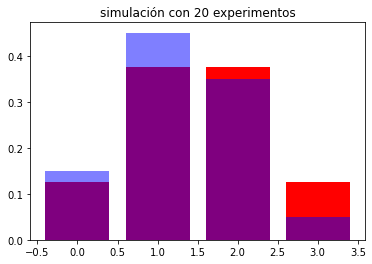

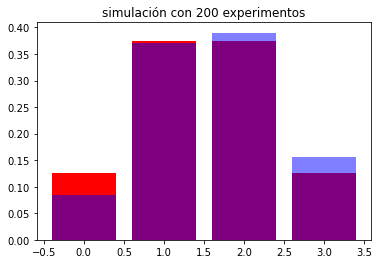

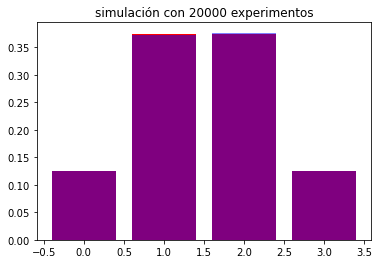

In [31]:
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))
  distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr)
  distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, distribucion_teorica, label = 'teoría', color = 'red')
  plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'blue')
  plt.title('simulación con {} experimentos'.format(num_trials))
  plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(20000)